WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import key_dict

# weather key
w_key = key_dict['owm']

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
print(len(cities))

603


Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
#create lists 
city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
#perform API query and print log 
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={w_key}&units={units}&q="

#loop for cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : saskylakh
Processing Record 2 of Set 1 : taubate
Processing Record 3 of Set 1 : changtu
Processing Record 4 of Set 1 : yellowknife
City not found. Skipping...
Processing Record 5 of Set 1 : mahebourg
Processing Record 6 of Set 1 : severo-kurilsk
Processing Record 7 of Set 1 : geraldton
Processing Record 8 of Set 1 : barrow
Processing Record 9 of Set 1 : albany
Processing Record 10 of Set 1 : lasa
Processing Record 11 of Set 1 : komsomolskiy
Processing Record 12 of Set 1 : krasnoselkup
Processing Record 13 of Set 1 : ponta do sol
Processing Record 14 of Set 1 : augusto correa
Processing Record 15 of Set 1 : berlevag
Processing Record 16 of Set 1 : touros
Processing Record 17 of Set 1 : baden
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : cabo san lucas
Processing Record 20 of Set 1 : rikitea
Processing Record 21 of Set 1 : wageningen
City not found. Skipping...
Processing 

Processing Record 34 of Set 4 : leh
Processing Record 35 of Set 4 : celestun
Processing Record 36 of Set 4 : saint george
Processing Record 37 of Set 4 : dikson
Processing Record 38 of Set 4 : redcliffe
Processing Record 39 of Set 4 : roald
Processing Record 40 of Set 4 : cordele
Processing Record 41 of Set 4 : nanortalik
City not found. Skipping...
Processing Record 42 of Set 4 : basarabeasca
Processing Record 43 of Set 4 : esperance
Processing Record 44 of Set 4 : clyde river
Processing Record 45 of Set 4 : kardla
Processing Record 46 of Set 4 : nacala
Processing Record 47 of Set 4 : port lincoln
Processing Record 48 of Set 4 : ambunti
Processing Record 49 of Set 4 : limbang
Processing Record 50 of Set 4 : north chicago
Processing Record 0 of Set 5 : champerico
Processing Record 1 of Set 5 : effium
Processing Record 2 of Set 5 : sawankhalok
Processing Record 3 of Set 5 : honiara
Processing Record 4 of Set 5 : tuatapere
Processing Record 5 of Set 5 : daru
City not found. Skipping...
P

Processing Record 18 of Set 8 : dong hoi
Processing Record 19 of Set 8 : palana
Processing Record 20 of Set 8 : cruz
Processing Record 21 of Set 8 : nyurba
Processing Record 22 of Set 8 : dawei
Processing Record 23 of Set 8 : artyom
Processing Record 24 of Set 8 : ailigandi
Processing Record 25 of Set 8 : amudat
Processing Record 26 of Set 8 : ambanja
Processing Record 27 of Set 8 : saint-francois
Processing Record 28 of Set 8 : bayeux
City not found. Skipping...
Processing Record 29 of Set 8 : gamba
Processing Record 30 of Set 8 : aklavik
Processing Record 31 of Set 8 : pedernales
Processing Record 32 of Set 8 : sur
Processing Record 33 of Set 8 : makasar
Processing Record 34 of Set 8 : honningsvag
Processing Record 35 of Set 8 : araouane
Processing Record 36 of Set 8 : marsabit
Processing Record 37 of Set 8 : evensk
Processing Record 38 of Set 8 : formosa
Processing Record 39 of Set 8 : college
Processing Record 40 of Set 8 : znamenskoye
Processing Record 41 of Set 8 : beyneu
Process

 Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [5]:
#Create a dataframe 
weather_info_df = pd.DataFrame({"City" : city_list,"Lat" : lat,"Lng" : lng,
    "Max Temp" : max_temp, "Humidity" : humidity,"Clouds" : cloud,
    "Wind Speed" : wind_speed, "Country" : country,"Date" : date    
})

weather_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-29.34,93,45,8.66,RU,1616299046
1,Taubaté,-23.0264,-45.5553,69.80,88,20,6.91,BR,1616299046
2,Changtu,42.7788,124.0955,40.50,56,99,16.42,CN,1616299047
3,Yellowknife,62.4560,-114.3525,3.20,66,90,17.27,CA,1616299047
4,Mahébourg,-20.4081,57.7000,78.80,94,40,11.50,MU,1616299048


In [6]:
#save weather df to csv file

 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

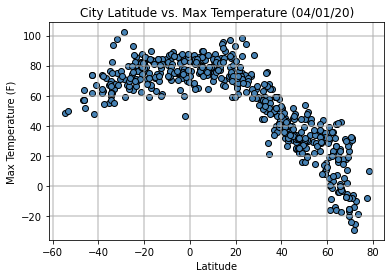

In [7]:
plt.scatter(weather_info_df["Lat"], weather_info_df["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

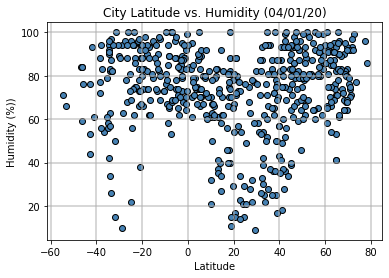

In [8]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

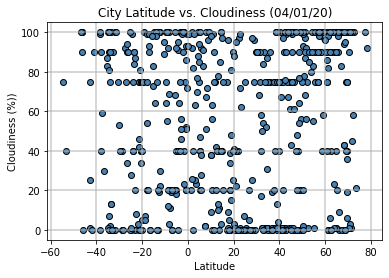

In [12]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

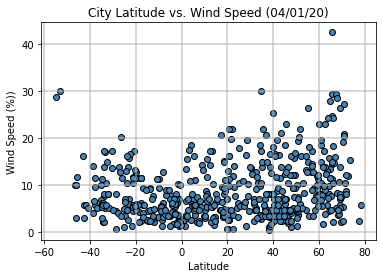

In [13]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

Linear Regression

In [16]:
# Create Northern/Southern Hemisphere DF
northern_df = weather_info_df.loc[pd.to_numeric(weather_info_df["Lat"]).astype(float) > 0, :]
southern_df = weather_info_df.loc[pd.to_numeric(weather_info_df["Lat"]).astype(float) < 0, :]

 Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sqaured is: -0.9020351711101732


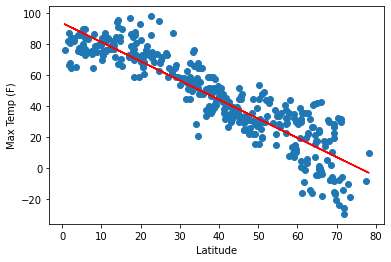

In [41]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-sqaured is: {rvalue}")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4711786950850912


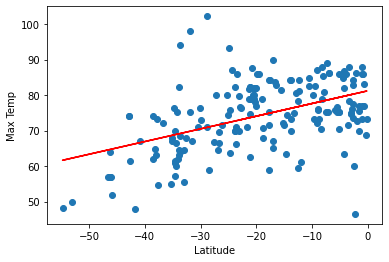

In [40]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2752093481752908


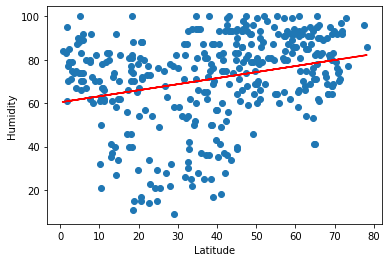

In [42]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2002634826119156


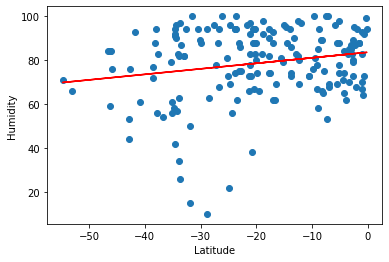

In [51]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1809824742442048


<function matplotlib.pyplot.show(*args, **kw)>

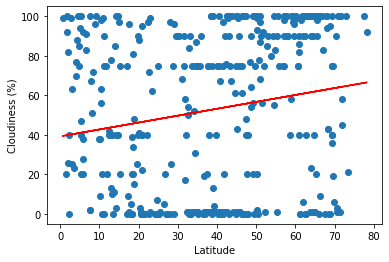

In [53]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06711305689056993


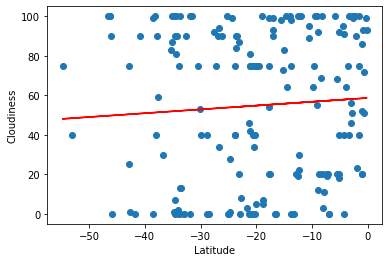

In [54]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2571215256582964


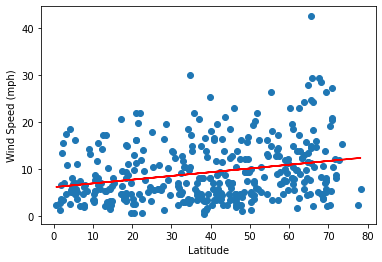

In [57]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.40704308150220825


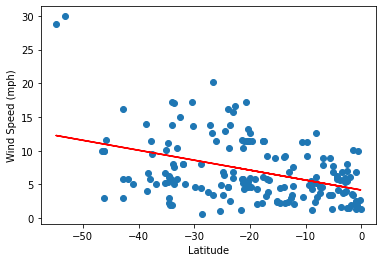

In [58]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()